In [9]:
# 2b Two-Way ANOVA - Interaction Effects 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import shapiro
from statsmodels.graphics.factorplots import interaction_plot
sns.set_theme(style='whitegrid')  # prettier plots

df = pd.read_csv("Dataset.csv") # Load the dataset into Python

# Perform a two-way ANOVA with Treatment_Group, Gender, and their interaction.
anova_2way = smf.ols('BP_Reduction ~ Treatment_Group + Gender + Treatment_Group * Gender', data=df).fit()

# Report the results for each effect (Treatment_Group, Gender, and their interaction).
sm.stats.anova_lm(anova_2way)

# Are the results consistent with the one-way analysis and does the effectiveness of treatment depend on gender?

,df,sum_sq,mean_sq,F,PR(>F)
Treatment_Group,2.0,492.628844,246.314422,59.460516,2.045204e-17
Gender,1.0,437.864007,437.864007,105.700752,4.651566e-17
Treatment_Group:Gender,2.0,7.916121,3.958061,0.955479,3.883312e-01
Residual,94.0,389.393792,4.142487,NaN,NaN


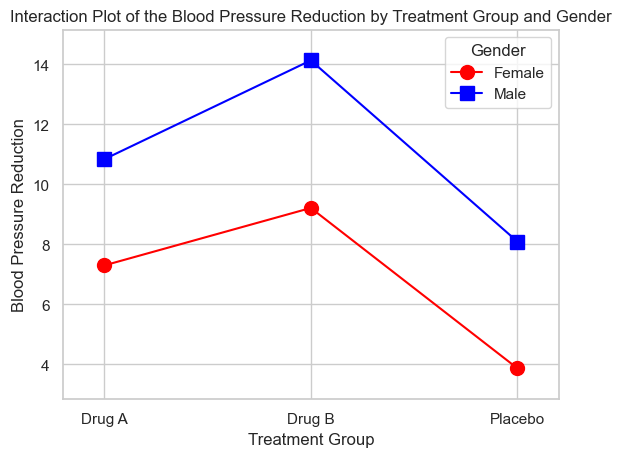

In [11]:
# Visualize the interaction using an interaction plot (BP_Reduction vs. Treatment_Group, separated by Gender).
interaction_plot(
    x=df['Treatment_Group'],
    trace=df['Gender'],
    response=df['BP_Reduction'], 
    colors=['red', 'blue'],
    markers=['o', 's'],
    ms=10
)
plt.title("Interaction Plot of the Blood Pressure Reduction by Treatment Group and Gender")
plt.xlabel("Treatment Group")
plt.ylabel("Blood Pressure Reduction")
plt.grid(True)
plt.show()

# Interpret the interaction plot.